In [1]:
### PREREQUISITIES

### these are basic and should go easy
import sys
import pandas as pd
import numpy as np
import os
import string as str_p
import collections
import regex as re

### NLTK  - natural language processing 
###this requires installation
import nltk
from nltk.collocations import *

### Beautiful Soup and Urllib
### for scrapping of web data and parsing xml files
from urllib.request import urlopen
from bs4 import BeautifulSoup

### for network analysis
import networkx as nx

### for visualization
import plotly.plotly as py
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [2]:
### parse the xml
with open("data/data_EN/JMP_TEI_preklady_EN/EHRI-ET-JMP018_EN.xml") as file:
    soup = BeautifulSoup(file, "html.parser")

# Raw text cleaning

In [3]:
### find/identify camps
list_of_camps = []
for link in soup.find_all("placename", type="camp"):
    camp = [link.get_text(), link.get("ref")]
    if camp[1] not in [element[1] for element in list_of_camps]:
        list_of_camps.append(camp)
print([element[0].replace("\n", "") for element in list_of_camps])

['Kaiserwalde']


In [5]:
for place in soup.find_all("placename"):
    print(place.get("ref"))

http://www.geonames.org/456172/riga.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/458258/republic-of-latvia.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/458258/republic-of-latvia.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/456172/riga.html
https://portal.ehri-project.eu/keywords/ehri_terms-545
http://www.geonames.org/458258/republic-of-latvia.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/455898/salaspils.html
http://www.geonames.org/456172/riga.html
http://www.geonames.org/597427/republic-of-lithuania.html
http://www.geonames.org/458258/republic-of-latvia.html
http://www.geonames.org/455898/salaspils.html
http://www.geonames.org/456172/riga.html
https://portal.ehri-project.eu/keywords/ehri_camps-788
http://www.geonames.org/456172/riga.html
http://www.geonames.org/2921044/federal-republic-of-germany.html
http://www.geonames.org/3063739/uherske-hradi

In [7]:
### find/identify geonames
def replacer_place(string):
    return re.split(r'\.html', re.split(r'\.org\/', string)[1])[0].replace("/", "_")

def ehri_url_title_returner(url):
    ref = url
    page = urlopen(ref)
    soup_simple = BeautifulSoup(page, "html.parser")
    return soup_simple.find("title").get_text().partition("EHRI - ")[2].replace(" ", "_")

In [ ]:
"Republic-of-latvia".replace()

In [105]:
place_names = []
for place in soup.find_all("placename"):
    if "geonames" in str(place.get):
        place_name_modified = replacer_place(place.get("ref")).partition("_")[2]
        place_name_modified = place_name_modified.replace("-", "_")
        place_names.append([place.get_text(), place.get("ref"), place_name_modified])
    if "portal.ehri" in str(place.get):
        place_names.append([place.get_text(), place.get("ref"), ehri_url_title_returner(place.get("ref")).partition("_conc")[0]])
    if "ehri_et_" in str(place.get):
        
        place_names.append([place.get_text(), "ehri_et", place.get("ref").partition("ehri_et_")[2].capitalize()])
place_names

[['Riga', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Riga', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Latvian',
  'http://www.geonames.org/458258/republic-of-latvia.html',
  'republic_of_latvia'],
 ['Riga', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Latvia',
  'http://www.geonames.org/458258/republic-of-latvia.html',
  'republic_of_latvia'],
 ['Riga', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Letgaler', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['ghetto',
  'https://portal.ehri-project.eu/keywords/ehri_terms-545',
  'Ghettos'],
 ['Latvian',
  'http://www.geonames.org/458258/republic-of-latvia.html',
  'republic_of_latvia'],
 ['Moskauer Strasse', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Moscow Street', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Salasplis', 'http://www.geonames.org/455898/salaspils.html', 'salaspils'],
 ['Riga', 'http://www.geonames.org/456172/riga.html', 'riga'],
 ['Latvia',
  

In [12]:
ehri_url_title_returner("https://portal.ehri-project.eu/keywords/ehri_ghettos-513")

'Łódź_Ghetto'

In [13]:
for persname in soup.find_all("persname"):
    print(persname)

<persname>Michal Frankl</persname>
<persname>Magdalena Sedlická</persname>
<persname>Wolfgang Schellenbacher</persname>
<persname ref="#ehri_et_berner_isaak">Isaak Berner</persname>
<persname ref="#ehri_et_berner_isaak">Berner Isaak</persname>
<persname ref="#ehri_et_stieglitz_robert">Stieglitz</persname>
<persname ref="#ehri_et_eljaschow_michael">Eljachow</persname>
<persname ref="#ehri_et_mincs_vladimir">Minz</persname>
<persname ref="#ehri_et_kaugert">Kaugert</persname>
<persname ref="#ehri_et_minsker">Winzker</persname>
<persname ref="#ehri_et_blumenthal">Blumfeld</persname>
<persname ref="#ehri_et_eljaschow_michael">Eljachow</persname>
<persname ref="#ehri_et_schulze">Schulze</persname>
<persname ref="https://portal.ehri-project.eu/authorities/ehri_pers-000196">Jeckeln</persname>
<persname ref="https://portal.ehri-project.eu/authorities/ehri_pers-000244">Lange</persname>
<persname ref="#ehri_et_schulze">Schulze</persname>
<persname ref="https://portal.ehri-project.eu/authorities/e

In [14]:
### find personal names
def replacer_pers(url):
    return url.partition("ehri_pers-")[2]
persnames = []
for persname in soup.find_all("persname"):
    if persname.get("ref") != None:
        if "ehri_et" in persname.get("ref"): 
            persnames.append([persname.get_text(), "ehri_name", persname.get("ref").partition("ehri_et_")[2]])
        if "portal.ehri" in persname.get("ref"):
            persnames.append([persname.get_text(), persname.get("ref"), ehri_url_title_returner(persname.get("ref"))])
    else:
        persname_changed =  persname.get_text().replace(" ", "_")
        if "__" in persname_changed:
            persname_changed = re.sub(r'__+', '_', " ", persname_changed)
        persnames.append([persname.get_text(), "name", persname_changed.replace("\n", "")])
persnames

[['Michal Frankl', 'name', 'Michal_Frankl'],
 ['Magdalena Sedlická', 'name', 'Magdalena_Sedlická'],
 ['Wolfgang Schellenbacher', 'name', 'Wolfgang_Schellenbacher'],
 ['Isaak Berner', 'ehri_name', 'berner_isaak'],
 ['Berner Isaak', 'ehri_name', 'berner_isaak'],
 ['Stieglitz', 'ehri_name', 'stieglitz_robert'],
 ['Eljachow', 'ehri_name', 'eljaschow_michael'],
 ['Minz', 'ehri_name', 'mincs_vladimir'],
 ['Kaugert', 'ehri_name', 'kaugert'],
 ['Winzker', 'ehri_name', 'minsker'],
 ['Blumfeld', 'ehri_name', 'blumenthal'],
 ['Eljachow', 'ehri_name', 'eljaschow_michael'],
 ['Schulze', 'ehri_name', 'schulze'],
 ['Jeckeln',
  'https://portal.ehri-project.eu/authorities/ehri_pers-000196',
  'Jeckeln_Friedrich'],
 ['Lange',
  'https://portal.ehri-project.eu/authorities/ehri_pers-000244',
  'Lange_Rudolf'],
 ['Schulze', 'ehri_name', 'schulze'],
 ['Jeckeln',
  'https://portal.ehri-project.eu/authorities/ehri_pers-000196',
  'Jeckeln_Friedrich'],
 ['Krauss', 'ehri_name', 'krause_kurt'],
 ['Roschmann', '

In [108]:
persnames_modified = list(set([element[2] for element in persnames]))
place_names_modified = list(set([element[2] for element in place_names]))
camp_names = list(set([element[2] for element in place_names if "camp" in element[1]]))

In [30]:
### extract raw text from the "soup" as a list of paragraphs
raw_text = []
all_p = soup.body.find_all("p")
for p in all_p:
    raw_text.append(p.get_text())

In [31]:
### make string from the list of paragraphs
raw_text_str = " ".join(raw_text)
raw_text_str[:200]

'Statement Recorded with: Berner Isaak, born: 18.6.1909 in Riga On July 1st, 1941, the Germans came to\n          Riga. On July 2nd, an auxiliary Latvian\nSS\n        troop was formed. They wore green arm'

In [32]:
### replace the raw text versions of place names and personal names by the preprocessed versions
for place in place_names:
    raw_text_str = raw_text_str.replace(" " + place[0], " " + place[2], 1)
for person in persnames:
    raw_text_str = raw_text_str.replace(" " + person[0], " " + person[2], 1)
raw_text_str[:200]

'Statement Recorded with: berner_isaak, born: 18.6.1909 in riga On July 1st, 1941, the Germans came to\n          riga. On July 2nd, an auxiliary republic_of_latvia\nSS\n        troop was formed. They wor'

In [33]:
### remove newlines characters
cleaned_text_1  = " ".join(raw_text_str.splitlines())
cleaned_text_2 = cleaned_text_1.replace("\xa0", " ")
if "  " in cleaned_text_2:
    cleaned_text_3 = re.sub(r'\s\s+', ' ', cleaned_text_2)

In [34]:
### remove punctuation
for character in str_p.punctuation:
    if (character != "_") and (character != "-"):
        cleaned_text_3 = cleaned_text_3.replace(character, "")
cleaned_text_list = [word for word in cleaned_text_3.split()]
print(cleaned_text_list[:100])

['Statement', 'Recorded', 'with', 'berner_isaak', 'born', '1861909', 'in', 'riga', 'On', 'July', '1st', '1941', 'the', 'Germans', 'came', 'to', 'riga', 'On', 'July', '2nd', 'an', 'auxiliary', 'republic_of_latvia', 'SS', 'troop', 'was', 'formed', 'They', 'wore', 'green', 'armbands', 'on', 'their', 'sleeves', 'with', 'a', 'skull', 'on', 'The', 'first', 'thing', 'this', 'auxiliary', 'troop', 'did', 'was', 'to', 'stop', 'Jews', 'in', 'the', 'street', 'to', 'humiliate', 'them', 'to', 'throw', 'Jewish', 'women', 'and', 'children', 'out', 'of', 'their', 'apartments', 'and', 'to', 'force', 'them', 'to', 'work', 'Work', 'was', 'done', 'clearing', 'up', 'where', 'the', 'aim', 'was', 'not', 'so', 'much', 'that', 'work', 'was', 'done', 'but', 'much', 'more', 'to', 'tyrannise', 'the', 'Jews', 'Beards', 'were', 'pulled', 'out', 'the', 'women']


# Lemmatization and POS-tagging

In [69]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lem(word):
    wordnet_lemmatizer.lemmatize(word.lower())

In [74]:
### lemmatize as verbs
lemmatized_document = [wordnet_lemmatizer.lemmatize(word.lower(), pos="v") for word in cleaned_text_list]
### lemmatize as nouns
lemmatized_document = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in lemmatized_document]
print(lemmatized_document[:100])

['statement', 'record', 'with', 'berner_isaak', 'bear', '1861909', 'in', 'riga', 'on', 'july', '1st', '1941', 'the', 'german', 'come', 'to', 'riga', 'on', 'july', '2nd', 'an', 'auxiliary', 'republic_of_latvia', 's', 'troop', 'be', 'form', 'they', 'wear', 'green', 'armband', 'on', 'their', 'sleeve', 'with', 'a', 'skull', 'on', 'the', 'first', 'thing', 'this', 'auxiliary', 'troop', 'do', 'be', 'to', 'stop', 'jew', 'in', 'the', 'street', 'to', 'humiliate', 'them', 'to', 'throw', 'jewish', 'woman', 'and', 'child', 'out', 'of', 'their', 'apartment', 'and', 'to', 'force', 'them', 'to', 'work', 'work', 'be', 'do', 'clear', 'up', 'where', 'the', 'aim', 'be', 'not', 'so', 'much', 'that', 'work', 'be', 'do', 'but', 'much', 'more', 'to', 'tyrannise', 'the', 'jew', 'beard', 'be', 'pull', 'out', 'the', 'woman']


In [89]:
### generate POS-tags
postagged_document = nltk.pos_tag(lemmatized_document, lang="eng")
print(postagged_document[:100])

[('statement', 'NN'), ('record', 'NN'), ('with', 'IN'), ('berner_isaak', 'JJ'), ('bear', 'JJ'), ('1861909', 'CD'), ('in', 'IN'), ('riga', 'NN'), ('on', 'IN'), ('july', 'NN'), ('1st', 'CD'), ('1941', 'CD'), ('the', 'DT'), ('german', 'JJ'), ('come', 'NN'), ('to', 'TO'), ('riga', 'VB'), ('on', 'IN'), ('july', 'NN'), ('2nd', 'CD'), ('an', 'DT'), ('auxiliary', 'JJ'), ('republic_of_latvia', 'NN'), ('s', 'NN'), ('troop', 'NN'), ('be', 'VB'), ('form', 'VBN'), ('they', 'PRP'), ('wear', 'VBP'), ('green', 'JJ'), ('armband', 'NN'), ('on', 'IN'), ('their', 'PRP$'), ('sleeve', 'NN'), ('with', 'IN'), ('a', 'DT'), ('skull', 'NN'), ('on', 'IN'), ('the', 'DT'), ('first', 'JJ'), ('thing', 'NN'), ('this', 'DT'), ('auxiliary', 'JJ'), ('troop', 'NN'), ('do', 'VBP'), ('be', 'VB'), ('to', 'TO'), ('stop', 'VB'), ('jew', 'NN'), ('in', 'IN'), ('the', 'DT'), ('street', 'NN'), ('to', 'TO'), ('humiliate', 'VB'), ('them', 'PRP'), ('to', 'TO'), ('throw', 'VB'), ('jewish', 'JJ'), ('woman', 'NN'), ('and', 'CC'), ('chil

In [90]:
### check unique values of TAGS
print(set([pos_tagged[1] for pos_tagged in postagged_document]))

{'JJS', 'MD', '$', 'JJR', 'RB', 'RP', 'VB', 'TO', 'NNS', 'IN', 'NNP', 'JJ', 'PRP', 'WDT', 'WP', 'VBG', 'CC', 'CD', 'VBN', 'EX', 'PRP$', 'VBP', 'VBZ', 'VBD', 'PDT', 'NN', 'WRB', 'DT'}


In [91]:
### to identify our geonames and pers names
exceptions = []
for element in (set(lemmatized_document)):
   ### if ("_") in element:
    if (element in persnames_modified) or (element in place_names_modified):
        exceptions.append(element)
    if element == "ss":
        exceptions.append(element.upper())

In [92]:
### to subselect only nouns, verbs and adjectives
document_filtered = []
postagged_document_filtered = []
for pos_tuple in postagged_document:
    if (pos_tuple[1] in ["NN", "NNP", "NNS", "JJ", "JJR", "JJS", 'VB', 'VBD', 'VBG','VBN', 'VBP','VBZ']) or (pos_tuple[0] in exceptions):
        ### ignore some words
        if pos_tuple[0] not in ['–', "ie", "i", "be"]:
            postagged_document_filtered.append(pos_tuple)
            document_filtered.append(pos_tuple[0])    
print(document_filtered[:30])

['statement', 'record', 'berner_isaak', 'bear', 'riga', 'july', 'german', 'come', 'riga', 'july', 'auxiliary', 'republic_of_latvia', 's', 'troop', 'form', 'wear', 'green', 'armband', 'sleeve', 'skull', 'first', 'thing', 'auxiliary', 'troop', 'do', 'stop', 'jew', 'street', 'humiliate', 'throw']


In [93]:
len(document_filtered)

764

In [99]:
nouns = list(set([element[0] for element in postagged_document_filtered if element[1].startswith("NN")]))
verbs = list(set([element[0] for element in postagged_document_filtered if element[1].startswith("V")]))

# Wordcloud

In [58]:
### based on https://www.datacamp.com/community/tutorials/wordcloud-python

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.0, 12.0)

In [127]:
wordcloud = WordCloud(max_font_size=30, max_words=200, background_color="white").generate(" ".join(document_filtered))
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}
        self.default_color = default_color
    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
color_to_words = {
    "green" : nouns,
    "red" : camp_names,
    "orange" : place_names_modified,
    "blue" : persnames_modified}
default_color = "gray"
grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

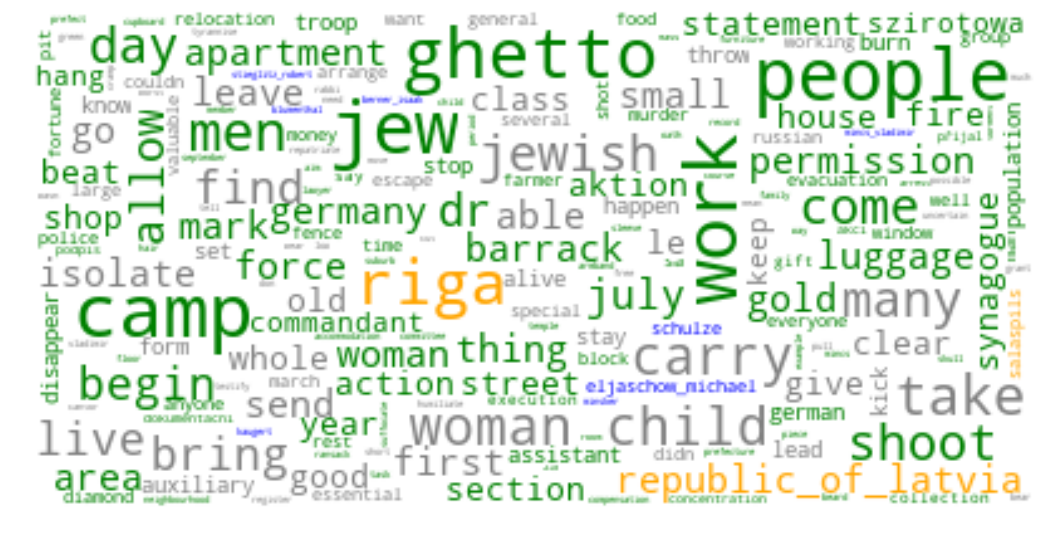

In [128]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()